___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [119]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<p style='color:yellow'>No Null data and there are object features in the dataset</p>

In [5]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


<AxesSubplot:>

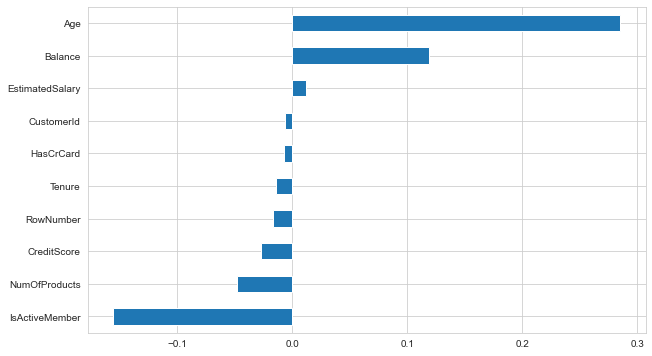

In [6]:
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh')

<AxesSubplot:>

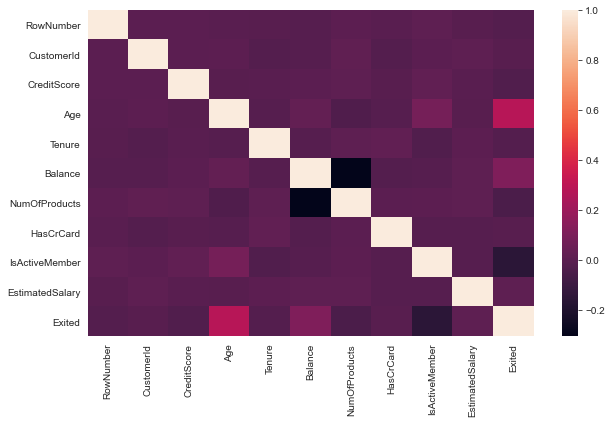

In [7]:
sns.heatmap(df.corr())

In [120]:
drop_col = ['CustomerId','RowNumber','Surname']
df.drop(drop_col, axis = 1, inplace = True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

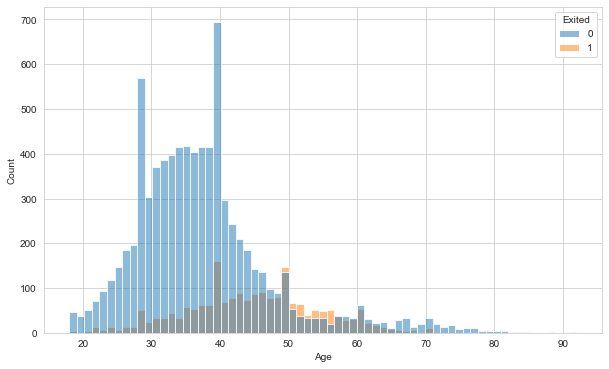

In [10]:
sns.histplot(x='Age', data=df, hue='Exited')

<AxesSubplot:xlabel='Age', ylabel='Count'>

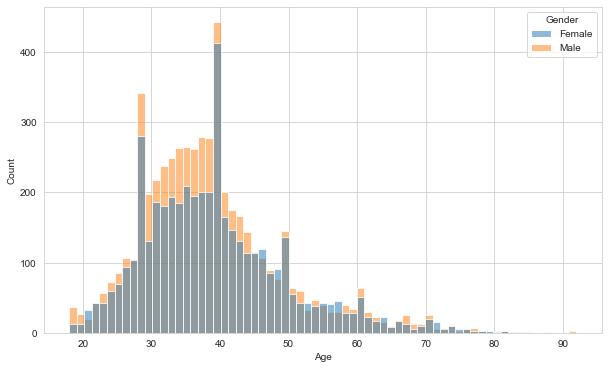

In [11]:
sns.histplot(x='Age', data=df, hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Count'>

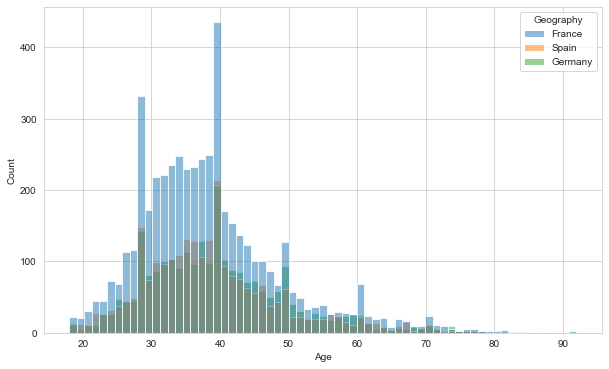

In [12]:
sns.histplot(x='Age', data=df, hue='Geography')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

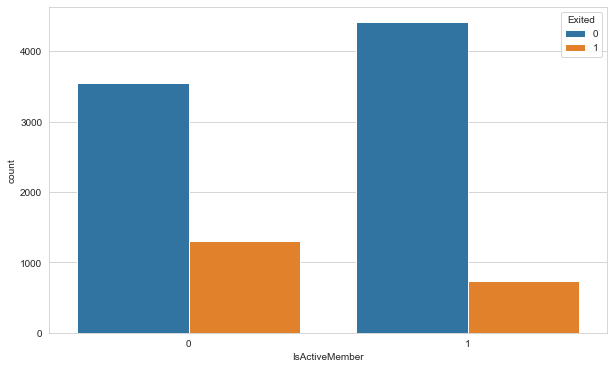

In [13]:
sns.countplot(x='IsActiveMember', data=df, hue='Exited')

<AxesSubplot:xlabel='Gender', ylabel='count'>

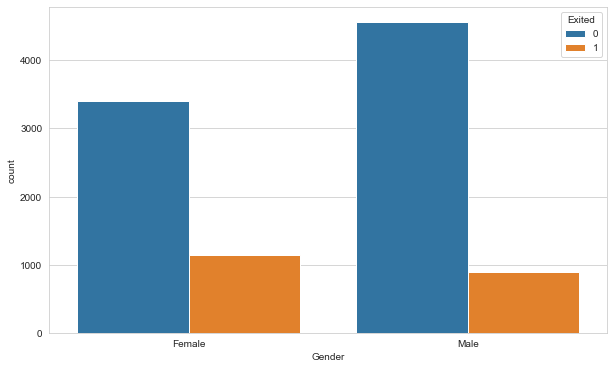

In [14]:
sns.countplot(x='Gender', data=df, hue='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

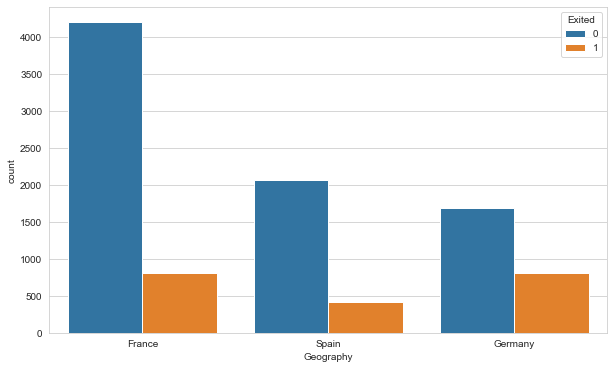

In [15]:
sns.countplot(x='Geography', data=df, hue='Exited')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

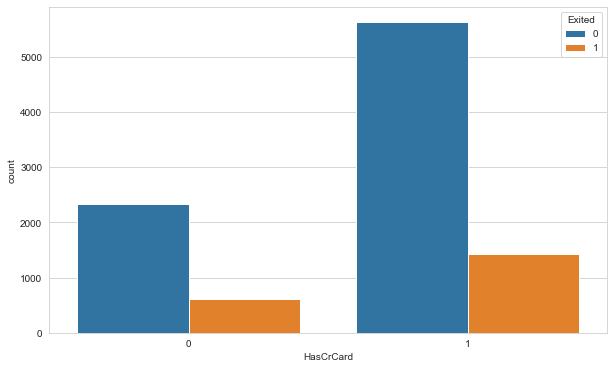

In [16]:
sns.countplot(x='HasCrCard', data=df, hue='Exited')

<AxesSubplot:>

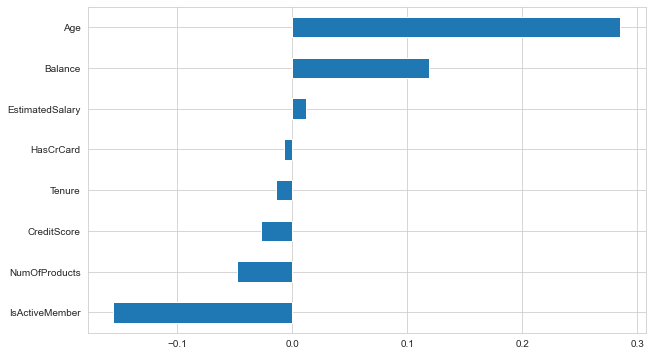

In [17]:
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh')

<p style='color:yellow'>I want to keep the above features even if there are some features with slight impact on the target</p>

In [121]:
df.shape

(10000, 11)

In [122]:
df_dum = pd.get_dummies(df)

In [123]:
df_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [126]:
X = df_dum.drop('Exited', axis=1)
y = df_dum['Exited']

In [127]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0


In [128]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify=y)

In [130]:
scaler = MinMaxScaler()

In [131]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [132]:
X_train.shape

(9000, 13)

In [133]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [134]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                224       
                                                                 
 dense_41 (Dense)            (None, 16)                272       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
254/254 [==============================] - 2s 3ms/step - loss: 0.5190 - accuracy: 0.7835 - val_loss: 0.4649 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7963 - val_loss: 0.4485 - val_accuracy: 0.8044
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4586 - accuracy: 0.8002 - val_loss: 0.4295 - val_accuracy: 0.8167
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.8068 - val_loss: 0.4169 - val_accuracy: 0.8311
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.8100 - val_loss: 0.4097 - val_accuracy: 0.8322
Epoch 6/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8131 - val_loss: 0.4033 - val_accuracy: 0.8422
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.8132 - val_loss: 0.4023 - val_accuracy: 0.8367

In [136]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.519,0.783,0.465,0.799
1,0.472,0.796,0.448,0.804
2,0.459,0.800,0.429,0.817
3,0.446,0.807,0.417,0.831
4,0.439,0.810,0.410,0.832


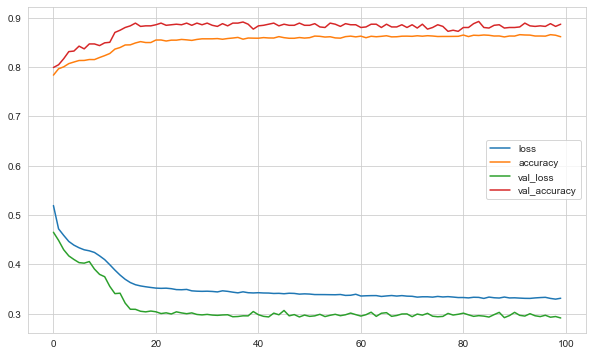

In [137]:
loss_df.plot();

In [138]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [37]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 82, epochs = 100, verbose=1)

Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.7960 - val_loss: 0.4857 - val_accuracy: 0.7989
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7960 - val_loss: 0.4718 - val_accuracy: 0.7989
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7960 - val_loss: 0.4602 - val_accuracy: 0.7989
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7989 - val_loss: 0.4478 - val_accuracy: 0.8111
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8004 - val_loss: 0.4378 - val_accuracy: 0.8133
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8030 - val_loss: 0.4314 - val_accuracy: 0.8167
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8063 - val_loss: 0.4215 - val_accuracy: 0.8222
Epoch 8/100
9

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.34150734543800354, 0.8610000014305115]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34150734543800354
accuracy :  0.8610000014305115


In [40]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[768  28]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.77      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [139]:
from tensorflow.keras.optimizers import Adam

In [42]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 82, epochs = 100, verbose=1)

Epoch 1/100
99/99 [==============================] - 1s 4ms/step - loss: 0.5532 - accuracy: 0.7621 - val_loss: 0.4878 - val_accuracy: 0.7989
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7960 - val_loss: 0.4632 - val_accuracy: 0.7989
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.7983 - val_loss: 0.4328 - val_accuracy: 0.8178
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8088 - val_loss: 0.4111 - val_accuracy: 0.8411
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8188 - val_loss: 0.4018 - val_accuracy: 0.8389
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8215 - val_loss: 0.3871 - val_accuracy: 0.8511
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8237 - val_loss: 0.3784 - val_accuracy: 0.8511
Epoch 8/100
9

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33873507380485535
accuracy :  0.8539999723434448


In [45]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[766  30]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [48]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 82, epochs = 100, verbose = 1)

Epoch 1/100
99/99 [==============================] - 1s 4ms/step - loss: 0.6214 - accuracy: 0.7298 - val_loss: 0.5211 - val_accuracy: 0.7989
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7943 - val_loss: 0.5087 - val_accuracy: 0.7989
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7960 - val_loss: 0.5006 - val_accuracy: 0.7989
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7960 - val_loss: 0.4949 - val_accuracy: 0.7989
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7960 - val_loss: 0.4960 - val_accuracy: 0.7989
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7960 - val_loss: 0.4900 - val_accuracy: 0.7989
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7960 - val_loss: 0.4884 - val_accuracy: 0.7989
Epoch 8/100
9

In [49]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3857128918170929
accuracy :  0.8330000042915344


In [50]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[787   9]
 [158  46]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       796
           1       0.84      0.23      0.36       204

    accuracy                           0.83      1000
   macro avg       0.83      0.61      0.63      1000
weighted avg       0.83      0.83      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [53]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [54]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7700 - val_loss: 0.4762 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7960 - val_loss: 0.4602 - val_accuracy: 0.7989
Epoch 3/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7962 - val_loss: 0.4413 - val_accuracy: 0.8000
Epoch 4/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.8070 - val_loss: 0.4156 - val_accuracy: 0.8356
Epoch 5/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.8151 - val_loss: 0.3960 - val_accuracy: 0.8344
Epoch 6/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.8185 - val_loss: 0.3743 - val_accuracy: 0.8400
Epoch 7/100
254/254 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8286 - val_loss: 0.3537 - val_accuracy: 0.8478

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33807146549224854
accuracy :  0.8600000143051147


#### Monitor the "val_recall" as metric

In [56]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [57]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 82, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
99/99 [==============================] - 1s 5ms/step - loss: 0.5837 - accuracy: 0.7295 - val_loss: 0.4948 - val_accuracy: 0.7989
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7960 - val_loss: 0.4770 - val_accuracy: 0.7989
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7960 - val_loss: 0.4663 - val_accuracy: 0.7989
Epoch 4/100
99/99 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7960 - val_loss: 0.4564 - val_accuracy: 0.7989
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7960 - val_loss: 0.4472 - val_accuracy: 0.7989
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7969 - val_loss: 0.4358 - val_accuracy: 0.8011
Epoch 7/100
99/99 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8102 - val_loss: 0.4167 - val_accuracy: 0.8378
Epoch 8/100
9

In [59]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34037432074546814
accuracy :  0.859000027179718


## GridSearchCV

In [61]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [62]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [63]:
seed = 42

In [64]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [65]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [66]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 150)

parameters = {'batch_size': [64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.002, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/150
127/127 [==============================] - 3s 7ms/step - loss: 0.5048 - accuracy: 0.7893 - val_loss: 0.4607 - val_accuracy: 0.7989
Epoch 2/150
127/127 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7984 - val_loss: 0.4292 - val_accuracy: 0.8233
Epoch 3/150
127/127 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8115 - val_loss: 0.4035 - val_accuracy: 0.8400
Epoch 4/150
127/127 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8174 - val_loss: 0.3971 - val_accuracy: 0.8444
Epoch 5/150
127/127 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8211 - val_loss: 0.3978 - val_accuracy: 0.8411
Epoch 6/150
127/127 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8223 - val_loss: 0.3752 - val_accuracy: 0.8522
Epoch 7/150
127/127 [==============================] - 0s 3ms/step - loss: 0.4097

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FE3EF05E80>,
             n_jobs=-1,
             param_grid={'batch_size': [64], 'learn_rate': [0.002, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [67]:
grid_model.best_score_

0.8585555555555555

In [68]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [69]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
5,0.859,0.009,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
3,0.858,0.010,2,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
0,0.858,0.013,3,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
4,0.858,0.013,4,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
1,0.858,0.013,5,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
7,0.857,0.011,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
2,0.796,0.010,7,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
6,0.796,0.010,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [70]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[759  37]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



32/32 [==============================] - 0s 2ms/step


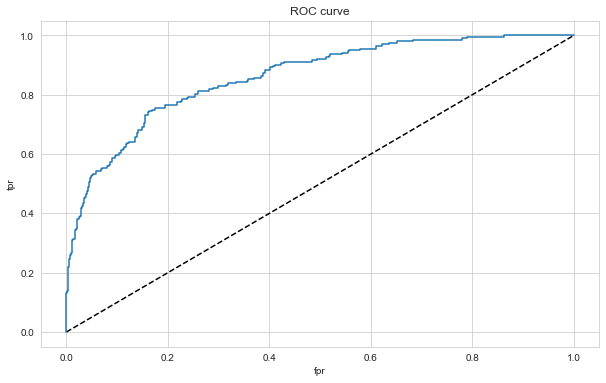

In [71]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [72]:
roc_auc_score(y_test, y_pred_proba)

0.8612548034289093

32/32 [==============================] - 0s 2ms/step


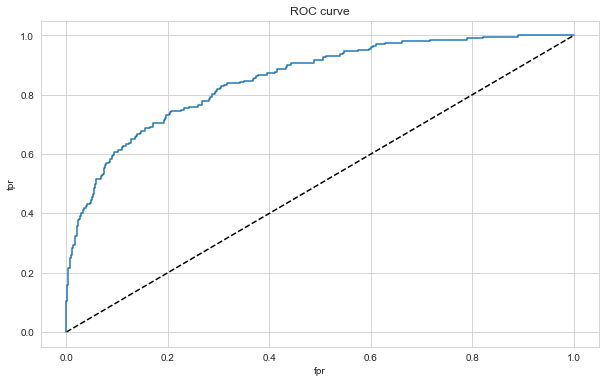

In [73]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [74]:
roc_auc_score(y_test, y_pred_proba)

0.8523315104936446

In [140]:
tf.random.set_seed(42)

model_final0 = Sequential()

model_final0.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model_final0.add(Dense(16, activation = "relu"))
model_final0.add(Dense(8, activation = "relu"))
model_final0.add(Dense(1, activation = "sigmoid"))
opt = RMSprop(lr = 0.003)

model_final0.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [141]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [142]:
X = scaler.fit_transform(X)

In [143]:
model_final0.fit(x = X, y = y, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 0.4809 - accuracy: 0.7922 - val_loss: 0.4545 - val_accuracy: 0.8160
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.8047 - val_loss: 0.4352 - val_accuracy: 0.8140
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8127 - val_loss: 0.4943 - val_accuracy: 0.7700
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.8168 - val_loss: 0.4221 - val_accuracy: 0.8170
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4093 - accuracy: 0.8264 - val_loss: 0.4239 - val_accuracy: 0.8200
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 0.3860 - accuracy: 0.8348 - val_loss: 0.3725 - val_accuracy: 0.8500
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8463 - val_loss: 0.3667 - val_accuracy: 0.8470

In [145]:
model_final0.evaluate(X_test, y_test, verbose=0)

[0.32020989060401917, 0.871999979019165]

In [146]:
y_pred = model_final0.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[780  16]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       796
           1       0.85      0.45      0.59       204

    accuracy                           0.87      1000
   macro avg       0.86      0.72      0.76      1000
weighted avg       0.87      0.87      0.86      1000



# Final Model and Model Deployment

In [147]:
scaler = MinMaxScaler()

In [148]:
scaler.fit(X)

MinMaxScaler()

In [149]:
import pickle
pickle.dump(scaler, open("scaler_churn0", 'wb'))

In [150]:
model_final0.save('model_churn0.h5')

## Prediction

In [87]:
from tensorflow.keras.models import load_model

In [151]:
model_churn = load_model('model_churn0.h5')
scaler_churn = pickle.load(open("scaler_churn0", "rb"))

In [159]:
X

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 1.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [152]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9757,501,France,Male,35,6,99760.840,1,1,1,13591.520,0


In [94]:
df_dum.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204,0.251,0.248,0.546
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403,0.434,0.432,0.498
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000,0.000,0.000,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000,0.000,0.000,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000,0.000,0.000,1.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000,1.000,0.000,1.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000,1.000,1.000,1.000


In [154]:
my_dict = {
    'CreditScore':520,
    'Geography':'France',
    'Gender': 'Female',
    'Age': 48,
    'Tenure' : 8,
    'Balance' : 150000.00,
    'NumOfProducts': 2,
    'HasCrCard' : 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 55000.00
}

In [166]:
df_ex = pd.DataFrame(my_dict, index = [1])
df_ex

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,520,France,Female,48,8,150000.000,2,1,0,55000.000


In [171]:
df_ex_dum = pd.get_dummies(df_ex).reindex(columns=df_dum.drop('Exited',axis=1).columns, fill_value=0)
df_ex_dum

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,520,48,8,150000.000,2,1,0,55000.000,1,0,0,1,0


In [173]:
(model_churn.predict(df_ex_dum) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

1/1 [==============================] - 0s 101ms/step


array([[1]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___